# Doble Rendija

a: Separación entre las rendijas

b: Ancho de las rendijas

$$I = I_{max} \left(\dfrac{\sin \beta}{\beta}\right)^2\cos^2\alpha$$

$$\beta = \dfrac{\pi b \sin\theta}{\lambda}, \quad \alpha = \dfrac{\pi a \sin\theta}{\lambda}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def alpha(a,lamb,sin):
    return np.pi*a*sin/lamb

def beta(b,lamb,sin):
    return np.pi*b*sin/lamb

In [117]:
def intds(a,b,lamb,sin):
    return (np.sin(beta(b,lamb,sin))/beta(b,lamb,sin))**2*(np.cos(alpha(a,lamb,sin)))**2

In [86]:
lam = 632.8e-9
a = 0.25e-3
b = np.array([0.10e-3,0.15e-3,0.20e-3])
sin = np.linspace(-0.01,0.01,250)

In [118]:
I = np.zeros((3,250))

In [119]:
for i in range(3):
    I[i,:] = intds(a,b[i],lam,sin)

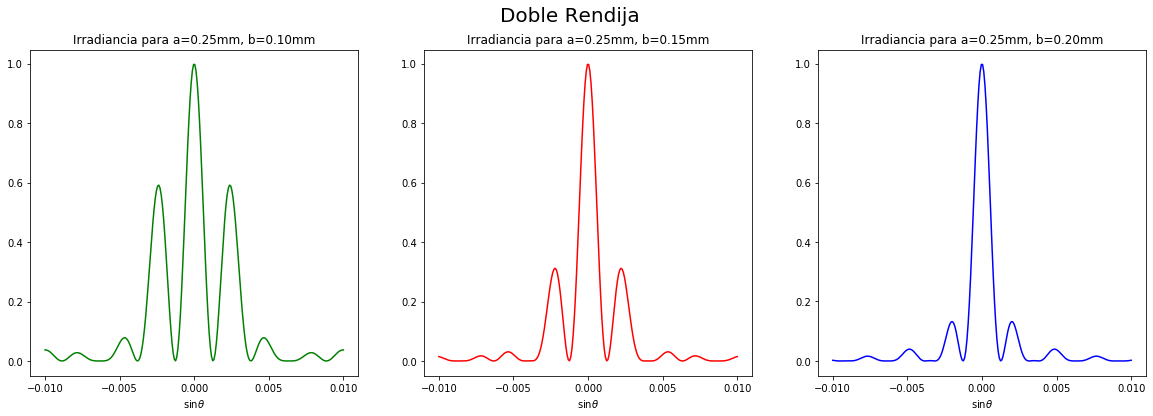

In [120]:
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

ax1.plot(sin,I[0,:],'g')
ax1.set_xlabel(r'$\sin\theta$')
ax1.set_xticks([-0.01,-0.005,0,0.005,0.01])
ax1.set_title('Irradiancia para a=0.25mm, b=0.10mm')

ax2.plot(sin,I[1,:],'r')
ax2.set_xlabel(r'$\sin\theta$')
ax2.set_xticks([-0.01,-0.005,0,0.005,0.01])
ax2.set_title('Irradiancia para a=0.25mm, b=0.15mm')

ax3.plot(sin,I[2,:],'b')
ax3.set_xlabel(r'$\sin\theta$')
ax3.set_xticks([-0.01,-0.005,0,0.005,0.01])
ax3.set_title('Irradiancia para a=0.25mm, b=0.20mm')

fig1.suptitle('Doble Rendija',fontsize=20)
fig1.savefig("double_slit_diffraction.png")
plt.show()

# Varias rendijas

$$I = I_{max} \left(\dfrac{\sin \beta}{\beta}\right)^2\left(\dfrac{\sin N\alpha}{\sin\alpha}\right)^2$$

In [121]:
def intvr(N,a,b,lamb,sin):
    return (np.sin(beta(b,lamb,sin))/beta(b,lamb,sin))**2*(np.sin(N*alpha(a,lamb,sin))/np.sin(alpha(a,lamb,sin)))**2

In [142]:
n = 5
an = np.array([1e-3,0.75e-3,0.50e-3,0.25e-3])
bn = 0.2e-3
sinn = np.linspace(-0.003,0.003,250)

In [143]:
In = np.zeros((4,250))

In [144]:
for i in range(4):
    In[i,:] = intvr(n,an[i],bn,lam,sinn)

In [151]:
def env(b,lamb,sin):
    return (np.sin(beta(b,lamb,sin))/beta(b,lamb,sin))**2

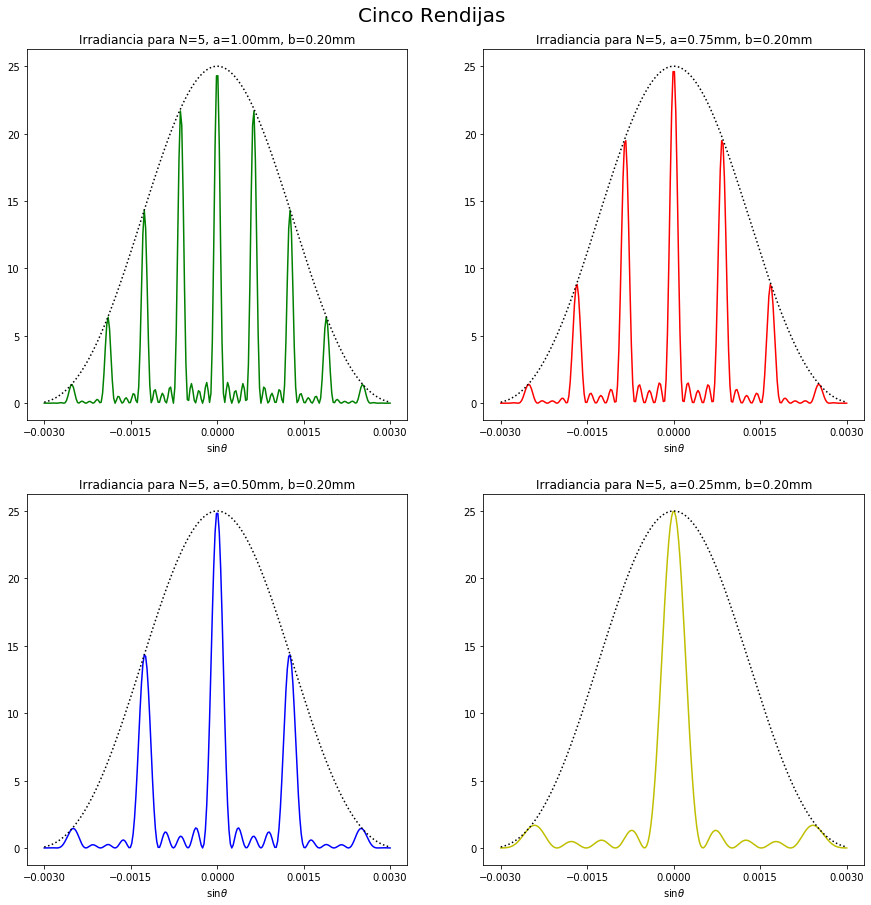

In [163]:
fig2, ((ax21,ax22),(ax23,ax24)) = plt.subplots(2,2,figsize=(15,15))

ax21.plot(sinn,In[0,:],'g')
ax21.plot(sinn,n**2*env(bn,lam,sinn),':k')
ax21.set_xlabel(r'$\sin\theta$')
ax21.set_xticks([-0.003,-0.0015,0,0.0015,0.003])
ax21.set_title('Irradiancia para N=5, a=1.00mm, b=0.20mm')

ax22.plot(sinn,In[1,:],'r')
ax22.plot(sinn,n**2*env(bn,lam,sinn),':k')
ax22.set_xlabel(r'$\sin\theta$')
ax22.set_xticks([-0.003,-0.0015,0,0.0015,0.003])
ax22.set_title('Irradiancia para N=5, a=0.75mm, b=0.20mm')

ax23.plot(sinn,In[2,:],'b')
ax23.plot(sinn,n**2*env(bn,lam,sinn),':k')
ax23.set_xlabel(r'$\sin\theta$')
ax23.set_xticks([-0.003,-0.0015,0,0.0015,0.003])
ax23.set_title('Irradiancia para N=5, a=0.50mm, b=0.20mm')

ax24.plot(sinn,In[3,:],'y')
ax24.plot(sinn,n**2*env(bn,lam,sinn),':k')
ax24.set_xlabel(r'$\sin\theta$')
ax24.set_xticks([-0.003,-0.0015,0,0.0015,0.003])
ax24.set_title('Irradiancia para N=5, a=0.25mm, b=0.20mm')

fig2.suptitle('Cinco Rendijas',fontsize=20,y=0.92)
fig2.savefig("five_slit_diffraction.png")
plt.show()